# Pandas入门

pandas提供了快速便捷处理结构化数据的大量数据结构和函数。

## 一、pandas数据结构介绍

Series和DataFrame  
个人理解Series类似一个字典，而DataFrame类似多个字典的组合

### Series
pd.Series(data=None, index=None, dtype=None)
- data：传入的数据，可以是ndarray、list等
- index：索引，必须是唯一的，且与数据的长度相等。如果没有传入索引参数，则默认会自动创建一个从0-N的整数索引
- dtype：数据的类型

#### (1)Series是一种类似于一维数组的对象，它由一组数据（各种NumPy数据类型）以及一组与之相关的数据标签（即索引）组成。

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
arr=[6,7,-5,9]
obj=pd.Series(arr)
obj
#左边是数据标签(索引),右边是数据

0    6
1    7
2   -5
3    9
dtype: int64

In [2]:
#索引
obj.index

RangeIndex(start=0, stop=4, step=1)

In [3]:
#值
obj.values

array([ 6,  7, -5,  9], dtype=int64)

#### (2)你可以自定义索引index==>(类似字典map)

In [4]:
obj2=pd.Series([1,-2,3,4],index=['a','b','c','d'])
obj2

a    1
b   -2
c    3
d    4
dtype: int64

#### (3)索引&根据索引修改值

In [5]:
obj2['a']

1

In [6]:
#根据索引index修改值value
obj2['b']=-6

In [7]:
#查询子串
obj2[['b','c','d']]

b   -6
c    3
d    4
dtype: int64

In [8]:
#根据值value来筛选
obj2[obj2>0]

a    1
c    3
d    4
dtype: int64

#### (4)运算

In [9]:
obj2*2

a     2
b   -12
c     6
d     8
dtype: int64

In [10]:
#取指数
np.exp(obj2)

a     2.718282
b     0.002479
c    20.085537
d    54.598150
dtype: float64

In [11]:
#判断index是否在Series内
'b' in obj2

True

#### (5)你可以传入字典map构建Series

In [12]:
#map字典
sdata={'Ohio':35000,'Texas':71000,'Oregon':16000,'Utah':5000}
#利用字典构建Series
obj3=pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [13]:
#传入字典，然后自己定义index
states=['Wuhan','Texas','Oregon','Utah']
obj4=pd.Series(sdata,index=states)
obj4
#可以发现Wuhan找不到对应的value

Wuhan         NaN
Texas     71000.0
Oregon    16000.0
Utah       5000.0
dtype: float64

In [14]:
#判断value是否为空
#obj4.isnull()同理
pd.isnull(obj4)
#pd.notnull()正好相反

Wuhan      True
Texas     False
Oregon    False
Utah      False
dtype: bool

In [15]:
#Series可以做运算，它会自动对齐（有的则做运算，没有的则NaN）
obj3+obj4

Ohio           NaN
Oregon     32000.0
Texas     142000.0
Utah       10000.0
Wuhan          NaN
dtype: float64

In [16]:
#可以为Series表格取名字，并对index列取名字
obj4.name='这个是表格名'
obj4.index.name='index_name'
obj4
#注意values没有name属性

index_name
Wuhan         NaN
Texas     71000.0
Oregon    16000.0
Utah       5000.0
Name: 这个是表格名, dtype: float64

### DataFrame
pd.DataFrame(data=None, index=None, columns=None)
- index：行标签。如果没有传入索引参数，则默认会自动创建一个从0-N的整数索引。
- columns：列标签。如果没有传入索引参数，则默认会自动创建一个从0-N的整数索引

&ensp;&ensp;DataFrame是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔值等）。虽然DataFrame是以二维结构保存数据的，但你仍然可以轻松地将其表示为更高维度的数据。

DataFrame的属性:  
- shape:返回行和列的元组
- index:DataFrame的行索引列表
- columns:DataFrame的列索引列表
- values:直接获取其中array的值
- T:转置
- head(5)：显示前5行内容
- tail(5):显示后5行内容

#### (1)通过字典创建DataFrame

In [17]:
data={'state':['Ohio','Ohio','Ohio','Nevada','Nevada','Nevada'],
     'year':[2000,2001,2002,2001,2002,2003],
     'pop':[1.5,1.7,3.6,2.4,2.9,3.2]}
frame=pd.DataFrame(data)
frame
#没有指定index,所以index是默认从0开始的

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [18]:
#head函数默认输出前5行
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [19]:
#可以自定义列标题顺序
pd.DataFrame(data,columns=['year','pop','state'])

,year,pop,state
0,2000,1.5,Ohio
1,2001,1.7,Ohio
2,2002,3.6,Ohio
3,2001,2.4,Nevada
4,2002,2.9,Nevada
5,2003,3.2,Nevada


In [20]:
#自定义index
frame2=pd.DataFrame(data,index=['A','B','C','D','E','F'])
frame2

,state,year,pop
A,Ohio,2000,1.5
B,Ohio,2001,1.7
C,Ohio,2002,3.6
D,Nevada,2001,2.4
E,Nevada,2002,2.9
F,Nevada,2003,3.2


#### (2)通过列名获取一列Series

In [21]:
frame2['state']

A      Ohio
B      Ohio
C      Ohio
D    Nevada
E    Nevada
F    Nevada
Name: state, dtype: object

In [22]:
frame2.year

A    2000
B    2001
C    2002
D    2001
E    2002
F    2003
Name: year, dtype: int64

#### (3)通过index获取一行Series

In [23]:
frame2.loc['A']

state    Ohio
year     2000
pop       1.5
Name: A, dtype: object

#### (4)删除一列

In [24]:
#首先先创造一列
frame2['eastern']=frame2.state=='Ohio'
frame2

,state,year,pop,eastern
A,Ohio,2000,1.5,True
B,Ohio,2001,1.7,True
C,Ohio,2002,3.6,True
D,Nevada,2001,2.4,False
E,Nevada,2002,2.9,False
F,Nevada,2003,3.2,False


In [25]:
#通过列名删除
del frame2['eastern']
frame2.columns

Index(['state', 'year', 'pop'], dtype='object')

#### (5)DataFrame也可以做转置

In [26]:
frame2.T

,A,B,C,D,E,F
state,Ohio,Ohio,Ohio,Nevada,Nevada,Nevada
year,2000,2001,2002,2001,2002,2003
pop,1.5,1.7,3.6,2.4,2.9,3.2


In [27]:
frame2.values

array([['Ohio', 2000, 1.5],
       ['Ohio', 2001, 1.7],
       ['Ohio', 2002, 3.6],
       ['Nevada', 2001, 2.4],
       ['Nevada', 2002, 2.9],
       ['Nevada', 2003, 3.2]], dtype=object)

## 二、基本功能

### 重新索引

In [28]:
obj=pd.Series([4.5,7.2,-5.3,3.6],index=['d','b','a','c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [29]:
#重新索引，没有的index默认为NaN
obj2=obj.reindex(['a','b','c','d','e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [30]:
#不同的步长
obj3=pd.Series(['blue','purple','yellow'],index=[0,2,4])
obj3
obj3.reindex(range(6),method='ffill') #ffill forward-fills the values 向前填充

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [31]:
#重新索引列名
#创建dataFrame
frame=pd.DataFrame(np.arange(9).reshape((3,3)),index=['a','b','c'],
                  columns=['A','B','C'])
frame

,A,B,C
a,0,1,2
b,3,4,5
c,6,7,8


In [32]:
#列可以用columns关键字重新索引
states=['Wuhan','Putian','C']
frame.reindex(columns=states)

,Wuhan,Putian,C
a,NaN,NaN,2
b,NaN,NaN,5
c,NaN,NaN,8


### 删除某个轴上的项

In [33]:
#删除Series上的某个项(因为只有一个轴，故不用选轴)
obj=pd.Series(np.arange(5.),index=['a','b','c','d','e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [34]:
#删除index为c的项
new_obj=obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [35]:
#也可以一次删除多个
obj.drop(['d','c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [36]:
#删除DataFrame上某个轴的某个项
df=pd.DataFrame(np.arange(16).reshape((4,4)),
               index=['Ohio','Colorado','Utah','New York'],
               columns=['A','B','C','D'])
df

,A,B,C,D
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [37]:
#删除行
df.drop(['Colorado','Utah'])

,A,B,C,D
Ohio,0,1,2,3
New York,12,13,14,15


In [38]:
#删除列
df.drop('A',axis=1) #这里要指定删除列，否则会报错==>axis='columns'可替换axis=1

,B,C,D
Ohio,1,2,3
Colorado,5,6,7
Utah,9,10,11
New York,13,14,15


### 索引、选取和过滤

#### (1)Series索引

In [39]:
#Series索引
obj=pd.Series(np.arange(4.),index=['a','b','c','d'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [40]:
#类似字典的索引（通过index索引）
obj['b']

1.0

In [41]:
#类似数组的索引
obj[1]

1.0

In [42]:
#切片的方式索引
obj[2:4]

c    2.0
d    3.0
dtype: float64

#### (2)DataFrame索引

In [43]:
#DataFrame索引
df=pd.DataFrame(np.arange(16).reshape((4,4)),
               index=['Ohio','Colorado','Utah','New York'],
               columns=['A','B','C','D'])
df

,A,B,C,D
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [44]:
#用一个值或序列对DataFrame进行索引其实就是获取一个或多个列
df['B']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: B, dtype: int32

In [45]:
df[['A','C']]

,A,C
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [46]:
#切片
df[:2]

,A,B,C,D
Ohio,0,1,2,3
Colorado,4,5,6,7


In [47]:
#过滤
df[df['A']>0]

,A,B,C,D
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### 用loc和iloc进行选取(行的选取)

&emsp;&emsp;对于DataFrame的行的标签索引，我引入了特殊的标签运算符loc和iloc。它们可以让你用类似NumPy的标记，使用轴标签（loc）或整数索引（iloc），从DataFrame选择行和列的子集。

In [48]:
#loc(使用轴标签)
df.loc['Ohio',['A','B']]

A    0
B    1
Name: Ohio, dtype: int32

In [49]:
#iloc(整数索引)
df.iloc[0:3,0:2]

,A,B
Ohio,0,1
Colorado,4,5
Utah,8,9


In [50]:
#表示第2行（从0行开始）
df.iloc[2]

A     8
B     9
C    10
D    11
Name: Utah, dtype: int32

### 算术运算和数据对齐

#### (1)Series

In [51]:
s1=pd.Series([7.3,-2.5,3.4,1.5],index=['a','b','c','d'])
s2=pd.Series([-2.1,3.6,-1.5,4,3.1],index=['a','c','e','f','g'])

In [52]:
s1

a    7.3
b   -2.5
c    3.4
d    1.5
dtype: float64

In [53]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [54]:
#自动对齐
s1+s2

a    5.2
b    NaN
c    7.0
d    NaN
e    NaN
f    NaN
g    NaN
dtype: float64

#### (2)DataFrame

In [55]:
df1=pd.DataFrame(np.arange(9.).reshape((3,3)),
                 columns=list('bcd'),
                 index=['Ohio','Texas','Colorado'])
df2=pd.DataFrame(np.arange(12.).reshape((4,3)),
                 columns=list('bde'),
                 index=['Utah','Ohio','Texas','Oregon'])

In [56]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [57]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [58]:
#自动对齐
df1+df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


### 算术运算中的填值

在对不同索引的对象进行算术运算时，你可能希望当一个对象中某个轴标签在另一个对象中找不到时填充一个特殊值（比如0）。

In [59]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),columns=list('abcde'))
df1+df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [60]:
df1.add(df2,fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


方法：  
add,radd:加法(+)；  
sub,rsub:减法(-)；  
div,rdiv:除法(/)；
floordiv,rfloordiv:用于底除(//)；  
mul,rmul:用于乘法(*)；  
pow,rpow:用于指数(**)；

### DataFrame和Series之间的运算

跟不同维度的NumPy数组一样，DataFrame和Series之间算术运算也是有明确规定的。==>广播

In [61]:
#计算一个二维数组与其第一行之间的差
arr=np.arange(12.).reshape((3,4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [62]:
arr-arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [63]:
#同理，用DataFrame减去Series
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                    columns=list('bde'),
                    index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series=frame.iloc[0]
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [64]:
frame-series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


### 函数应用和映射

NumPy的ufuncs（元素级数组方法）也可用于操作pandas对象。

In [65]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.043022,1.722734,1.805661
Ohio,-0.833497,1.536740,0.214056
Texas,0.207997,-0.356338,-0.814931
Oregon,-0.450212,0.422857,1.699617


In [66]:
#取绝对值函数abs()
np.abs(frame)

,b,d,e
Utah,0.043022,1.722734,1.805661
Ohio,0.833497,1.536740,0.214056
Texas,0.207997,0.356338,0.814931
Oregon,0.450212,0.422857,1.699617


In [67]:
#自定义函数
f=lambda x: x.max()-x.min() 
frame.apply(f)#这里的x默认为一个Series，也就是一列

b    1.041494
d    2.079072
e    2.620592
dtype: float64

In [68]:
#也可以设定为一行
frame.apply(f,axis='columns')

Utah      1.848683
Ohio      2.370237
Texas     1.022928
Oregon    2.149829
dtype: float64

In [69]:
#传递到apply的函数不是必须返回一个标量，还可以返回由多个值组成的Series
def f(x):
    return pd.Series([x.min(),x.max()],index=['min','max'])
frame.apply(f)

,b,d,e
min,-0.833497,-0.356338,-0.814931
max,0.207997,1.722734,1.805661


### 排序和排名

&emsp;&emsp;根据条件对数据集排序（sorting）也是一种重要的内置运算。要对行或列索引进行排序（按字典顺序），可使用sort_index方法，它将返回一个已排序的新对象。

#### (1)Series

##### 1)sort_index()

In [70]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
#对index进行排序
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

##### 2)sort_values()

In [71]:
#对值排序
obj2=pd.Series([4,7,-3,2])
obj2.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [72]:
#注意，若有缺失值NaN，都会被放到Series末尾
obj3= pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj3.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

##### 3)rank()

In [73]:
#rank是通过“为各组分配一个平均排名”的方式破坏平级关系的
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()
#说明：这里表示-5的排名是第一名，然后若有相同的数的话则加权平均(例如有两个7，则他的排序都是第6.5名)

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [74]:
#若不想相同的数加权平均，也可运用出现的顺序来排相同的数
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [75]:
#降序进行排名
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

#### (2)DataFrame

In [76]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['B', 'A'],
                     columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
B,0,1,2,3
A,4,5,6,7


##### 1)sort_index()

In [77]:
#对index进行排序
frame.sort_index()

,d,a,b,c
A,4,5,6,7
B,0,1,2,3


In [78]:
#对columns进行排序
frame.sort_index(axis=1)

,a,b,c,d
B,1,2,3,0
A,5,6,7,4


In [79]:
#数据默认是按升序排序的，但也可以降序排序
frame.sort_index(axis=1,ascending=False)

,d,c,b,a
B,0,3,2,1
A,4,7,6,5


##### 2)sort_values()

In [80]:
#也可按值排序
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [81]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [82]:
#也可对多个列的值进行排序
frame.sort_values(by=['a','b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


##### 3）rank()

In [83]:
frame = pd.DataFrame({ 'a': [0, 1, 0, 1],'b': [4.3, 7, -3, 2],
                      'c': [-2, 5, 8, -2.5]})
frame

,a,b,c
0,0,4.3,-2.0
1,1,7.0,5.0
2,0,-3.0,8.0
3,1,2.0,-2.5


In [84]:
frame.rank(axis='columns')

,a,b,c
0,2.0,3.0,1.0
1,1.0,3.0,2.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


### 带有重复标签的轴索引

#### (1)Series

In [85]:
#它的索引值不是唯一的
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj['a']

a    0
a    1
dtype: int64

#### (2)DataFrame

In [86]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df.loc['b']

,0,1,2
b,-1.539688,0.887587,0.177349
b,-1.396467,1.041014,-0.638415


## 三、汇总和计算描述统计

pandas对象拥有一组常用的数学和统计方法。

In [87]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


### sum()

In [88]:
#默认是返回一个含有列的和的Series
df.sum()

one    9.25
two   -5.80
dtype: float64

In [89]:
#传入axis='columns'或axis=1将会按行进行求和运算
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [90]:
#NA值会自动被排除，除非整个切片（这里指的是行或列）都是NA。通过skipna选项可以禁用该功能
df.sum(axis=1,skipna=False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

### idxmin()和idxmax()

最大值或最小值的索引

In [91]:
df.idxmax()

one    b
two    d
dtype: object

### cumsum()

累计

In [92]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


### describe()

于一次性产生多个汇总统计。

In [93]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


### 方法统计及说明

(1)count:非NA值的数量；  
(2)describe:针对Series和DataFrame列计算汇总统计；  
(3)min、max:最小值和最大值；  
(4)argmin、argmax:计算最小值和最大值索引(整数)；  
(5)idxmin、idxmax:计算能获得到的最小值和最大值的索引；  
(6)quantile:计算样本的分位数；  
(7)sum:值的总和；  
(8)mean:值的平均值；  
(9)median:值的算术中位数(50%分位数)；  
(10)mad:根据平均值计算平均绝对离差；  
(11)var:样本值的方差；  
(12)std:样本值的方差；  
(13)skew:样本值的偏度(三阶矩)；  
(14)kurt:样本值的峰度(四阶矩)；  
(15)cumsum:样本值的累计和；  
(16)cummin、cummax:样本值的累计最小值和最大值；  
(17)cumprod:样本值的累计积；  
(18)diff:计算一阶差分(对时间序列很有用)；  
(19)pct_change:计算百分数变化；  

### 相关系数和协方差

#### corr()

用于计算相关系数

#### cov()

用于计算协方差

### 唯一值、值计数以及成员资格

#### unique() ==》唯一值

In [96]:
#unique函数的作用是去重
obj=pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
uniques = obj.unique()
uniques
#需要的话，可以对结果再次进行排序（uniques.sort()）

array(['c', 'a', 'd', 'b'], dtype=object)

#### value_counts() ==》值的计数

value_counts用于计算一个Series中各值出现的频率

In [97]:
obj.value_counts()
#结果Series是按值频率降序排列的

a    3
c    3
b    2
d    1
dtype: int64

#### isin() ==》成员资格

In [99]:
#用于判断矢量化集合的成员资格
mask=obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [100]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

## 四、分组聚合案例

### 数据获取
从文件中读取星巴克店铺数据

In [5]:
#导入星巴克店的数据 
starbucks = pd.read_csv("./data/directory.csv")
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


### 进行分组聚合

In [9]:
#按照国家分组，求出每个国家的星巴克零售店数量
count=starbucks.groupby(['Country']).count()

#画图显示结果
count.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Postcode,Phone Number,Timezone,Longitude,Latitude
Country,,,,,,,,,,,,
AD,1,1,1,1,1,1,1,1,1,1,1,1
AE,144,144,144,144,144,144,144,24,78,144,144,144
AR,108,108,108,108,108,108,108,100,29,108,108,108
AT,18,18,18,18,18,18,18,18,17,18,18,18
AU,22,22,22,22,22,22,22,22,0,22,22,22


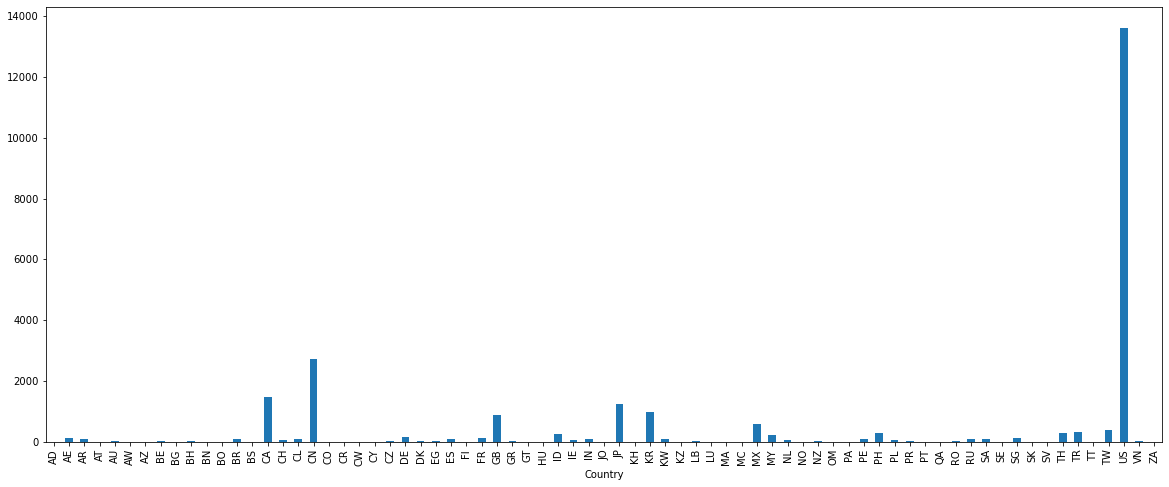

In [12]:
count['Brand'].plot(kind='bar',figsize=(20,8))
plt.show()

In [15]:
#加入省市一起聚合
#设置多个索引，set_index()
starbucks.groupby(['Country','State/Province']).count().head(10)
#与前面的MultiIndex结构类似

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
        RK                  3             3           3               3   
        SH                  6             6           6               6   
        UQ                  1             1           1               1   
AR      B                  21            21          21              21   
        C                  73            73          73              73   

                        Street Address  City  Postcode  Phone Number  \
Country State/Province                                                 
AD      7                            1     1         1             1   
AE      AJ                           2     2         0             0   
        AZ                          48    48         7            20   
        DU                          82    82        16            50   
        FU                           2     2         1             0   
        RK                           3     3         0             3   
        SH                           6     6         0             5   
        UQ                           1     1         0             0   
AR      B                           21    21        18             5   
        C                           73    73        71            24   

                        Timezone  Longitude  Latitude  
Country State/Province                                 
AD      7                      1          1         1  
AE      AJ                     2          2         2  
        AZ                    48         48        48  
        DU                    82         82        82  
        FU                     2          2         2  
        RK                     3          3         3  
        SH                     6          6         6  
        UQ                     1          1         1  
AR      B                     21         21        21  
        C                     73         73        73